# **MultiModal RAG App for Video Processing With LlamaIndex and LanceDB**

### 1. llamaindex framework
### 2. Lancedb Vector DataBase
### 3. LLM MultiModAl GPT-4V or Google-gemini-pro-vision


# **Steps Need to follow:**
#### 1. Download video from YouTube, process and store it.

#### 2. Build Multi-Modal index and vector store for both texts and images.

#### 3. Retrieve relevant images and context, use both to augment the prompt.

#### 4. Using GPT4V for reasoning the correlations between the input query and augmented data and generating final response.

In [1]:
%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai
%pip install llama-index-embeddings-clip
%pip install git+https://github.com/openai/CLIP.git
!pip install llama-index-readers-file

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-je17n5bo
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-je17n5bo
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Using cached ftfy-6.3.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached ftfy-6.3.1-py3-none-any.whl (44 kB)
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Us

In [2]:
%pip install llama_index
%pip install -U openai-whisper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.1/282.1 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 45.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20250625-py3-none-any.whl size=803979 sha256=4abdf82697b941cb429449670c3f18426d6e5a137ef759ff1a0a5f18ed795962
  Stored in directory: /root/.cache/pip/wheels/32/d2/9a/801b5cc5b2a1af2e280089b71c326711a682fc1d50ea29d0ed
Successfully built openai-whisper


In [3]:
%pip install lancedb
%pip install moviepy
%pip install yt_dlp
# %pip uninstall pytube -y
# %pip install git+https://github.com/pytube/pytube
# %pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install ftfy regex tqdm

  Cloning https://github.com/pytube/pytube to /tmp/pip-req-build-kaqyubot
  Running command git clone --filter=blob:none --quiet https://github.com/pytube/pytube /tmp/pip-req-build-kaqyubot
  Resolved https://github.com/pytube/pytube to commit a32fff39058a6f7e5e59ecd06a7467b71197ce35
  Preparing metadata (setup.py) ... done
  Created wheel for pytube: filename=pytube-15.0.0-py3-none-any.whl size=57675 sha256=c5c2e78c262fb496790e307388c84d4e2dd13242439d10c995be8b0cf6512905
  Stored in directory: /tmp/pip-ephem-wheel-cache-rtj133ao/wheels/5e/2a/b2/3c57f9cd8542ae82cd4247378230ac2e764e884224581a7072
Successfully built pytube
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 64.4 MB/s eta 0:00:00


ffmpeg-library enables you to use FFmpeg in Python to manipulate various media files for different purposes like building comprehensive multimedia applications, preprocessing media files.

MoviePy is a Python library for video editing, enabling cutting, concatenations, title insertions, video compositing, and effects like animations or color grading.

Pytube is a Python library used for downloading videos from YouTube. It supports downloading in various formats, resolutions, and also direct audio extraction.


Pydub is a Python library for audio manipulation, enabling easy loading,
editing, and exporting of audio files in various formats with minimal code.

The SpeechRecognition library in Python allows you to convert spoken language into text using various engines and APIs, such as Google Speech Recognition, IBM Speech to Text, etc.


SoundFile is a Python library for reading from and writing to audio files, supporting many formats through the libsndfile library, ideal for high-quality audio processing.

FTFY (Fix Text For You) is a Python library that fixes broken Unicode text and mojibake (garbled text due to encoding issues), making text legible again.

OpenAI Whisper is a robust, multilingual speech recognition model developed by OpenAI. It converts speech into text and supports various languages with high accuracy.

pprint is a Python module that provides a capability to "pretty-print" complex data structures in a well-formatted and more readable way than the basic print function.

In [4]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt

  if event.key is 'enter':



In [5]:
import os
from getpass import getpass

OPENAI_API_TOKEN = getpass("Enter your OpenAI API key: ")
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

Enter your OpenAI API key: ··········


In [7]:
# import os
# from google.colab import userdata
# OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')
# os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [6]:
import os
print(os.getcwd())

/content


In [31]:
# video_url="https://youtu.be/3dhcmeOTZ_Q"
video_url = "https://www.youtube.com/watch?v=tKPSmn-urB4"
# video_url = "https://www.youtube.com/watch?v=dQw4w9WgXcQ"

In [32]:
output_video_path = "/content/video_data/"

In [33]:
# from the video i am going to collect images,audio,text
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [34]:
!mkdir mixed_data

mkdir: cannot create directory ‘mixed_data’: File exists


In [35]:
filepath=output_video_path + "input_vid.mp4"
print(filepath)

/content/video_data/input_vid.mp4


In [36]:
# from pytube import YouTube
# def download_video(url,output_path):
#   yt = YouTube(url)
#   metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}

#   yt.streams.get_highest_resolution().download(
#         output_path=output_path, filename="input_vid.mp4"
#     )
#   return metadata

In [46]:
import yt_dlp

def download_video(url, output_path):
    ydl_opts = {
        'outtmpl': f'{output_path}/input_vid.%(ext)s',  # Save as input_vid.mp4
        'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/best[ext=mp4]/best',
        'merge_output_format': 'mp4'
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(url, download=True)
        return {
            "Title": info.get("title"),
            "Author": info.get("uploader"),
            "Views": info.get("view_count")
        }


In [47]:
from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_folder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2
  )

In [48]:
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)

In [49]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text

In [50]:
video_url

'https://www.youtube.com/watch?v=tKPSmn-urB4'

In [51]:
output_video_path

'/content/video_data/'

In [52]:
metadata_vid = download_video(video_url, output_video_path)

[youtube] Extracting URL: https://www.youtube.com/watch?v=tKPSmn-urB4
[youtube] tKPSmn-urB4: Downloading webpage
[youtube] tKPSmn-urB4: Downloading tv client config
[youtube] tKPSmn-urB4: Downloading tv player API JSON
[youtube] tKPSmn-urB4: Downloading ios player API JSON
[youtube] tKPSmn-urB4: Downloading m3u8 information
[info] Testing format 614
[info] tKPSmn-urB4: Downloading 1 format(s): 614+140
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 38
[download] Destination: /content/video_data//input_vid.f614.mp4
[download] 100% of   38.17MiB in 00:00:02 at 18.14MiB/s                
[download] Destination: /content/video_data//input_vid.f140.m4a
[download] 100% of    2.72MiB in 00:00:00 at 17.15MiB/s  
[Merger] Merging formats into "/content/video_data//input_vid.mp4"
Deleting original file /content/video_data//input_vid.f140.m4a (pass -k to keep)
Deleting original file /content/video_data//input_vid.f614.mp4 (pass -k to keep)


In [53]:
metadata_vid

{'Title': 'AI Explained: What is RAG - Retrieval Augmented Generation?',
 'Author': 'Morten Rand-Hendriksen',
 'Views': 9449}

In [54]:
video_to_images(filepath,output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [55]:
filepath

'/content/video_data/input_vid.mp4'

In [56]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [57]:
video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [58]:
text_data=audio_to_text(output_audio_path)

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 73.8MiB/s]


In [59]:
text_data

" You've probably heard the story of how Reddit is selling their data to Google for AI scraping, how automatic is selling all the WordPress and Tumblr data, and now how financial times is selling their data to open AI. And this doesn't sound right, because we've been told that these AI companies are taking all this data and basically invalidating the data sources they're coming from by sharing the data so you don't get to the source. So what exactly is happening here? This is more complicated than it sounds. You see, there are two different things these AI companies can do with the data. One is use it for training, you know, building new models based on the data and they're definitely doing that in some respect. But the other one is to use the data as a grounded source. And that's really interesting. So let me explain. Here's a very simplified drawing of what happens when you use AI system like Chatchy PT. You put in a prompt, the prompt goes to the AI system and the AI system creates 

In [60]:
with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
print("Text data saved to file")
file.close()


Text data saved to file


In [61]:
os.remove(output_audio_path)
print("Audio file removed")

Audio file removed


In [ ]:
#process the video
#image
#text

In [62]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [63]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [64]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

In [65]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [66]:
output_folder

'/content/mixed_data/'

In [67]:
documents=SimpleDirectoryReader(output_folder).load_data()

In [68]:
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 53.4MiB/s]


In [69]:
retriever_engine=index.as_retriever(similarity_top_k=1, image_similarity_top_k=5)

In [70]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [71]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [74]:
query="can you tell me what is RAG?"

In [75]:
img,text=retrieve(retriever_engine,query)

**Node ID:** 037df946-3bcc-4b87-8c8b-beb5e8ef64bd<br>**Similarity:** 0.5835888385772705<br>**Text:** You've probably heard the story of how Reddit is selling their data to Google for AI scraping, how automatic is selling all the WordPress and Tumblr data, and now how financial times is selling the...<br>

In [76]:
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

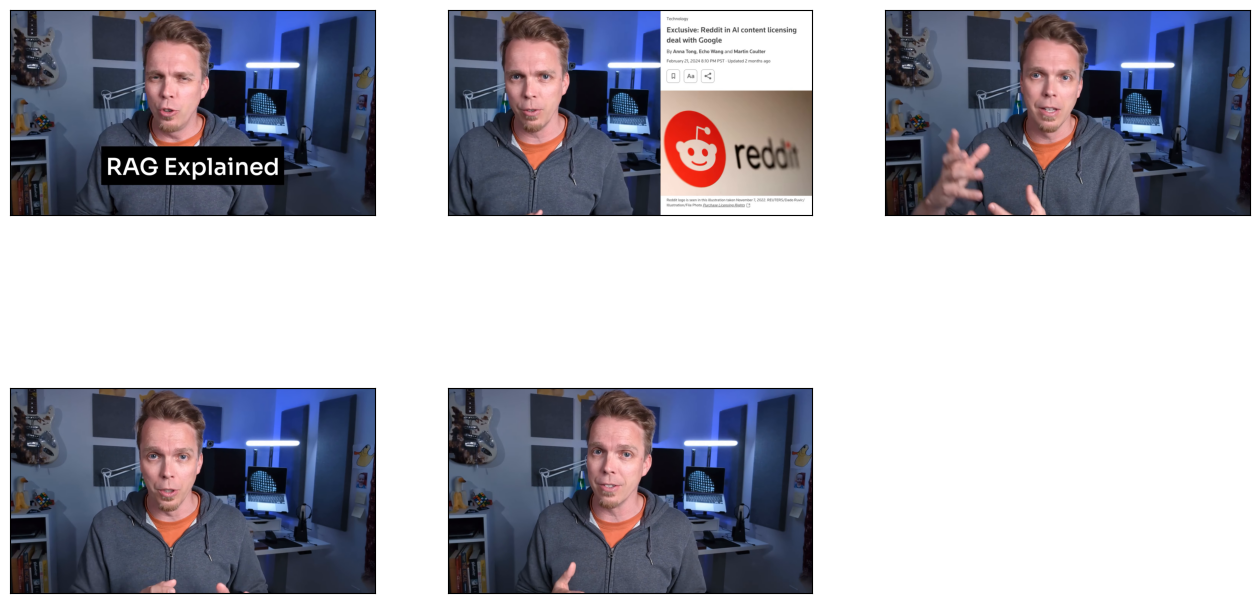

In [77]:
plot_images(img)

In [78]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [79]:
img

['/content/mixed_data/frame0000.png',
 '/content/mixed_data/frame0001.png',
 '/content/mixed_data/frame0035.png',
 '/content/mixed_data/frame0009.png',
 '/content/mixed_data/frame0008.png']

In [80]:
import json
metadata_str=json.dumps(metadata_vid)

In [92]:
query_str="can you tell me what is RAG?"

In [93]:
context_str = "".join(text)

In [94]:
image_documents = SimpleDirectoryReader( input_files=img).load_data()

In [95]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [96]:
# openai_mm_llm = OpenAIMultiModal(model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=1500)
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o",  # ✅ Use the latest vision-capable model
    api_key=OPENAI_API_TOKEN,
    max_new_tokens=1500
)


In [97]:
# result=openai_mm_llm.complete(
#     prompt=qa_tmpl_str.format(
#         query_str=query_str,metadata_str=metadata_str
#     ),
#     image_documents=image_documents,
# )

result=openai_mm_llm.complete(
    prompt=qa_tmpl_str.format(
    query_str=query_str,
    metadata_str=metadata_str,
    context_str=context_str  # ← Add this
),
  image_documents=image_documents,
)




In [98]:
pprint(result.text)

('RAG, or Retrieval Augmented Generation, is a process used in AI systems to '
 'improve the accuracy of responses. Instead of relying solely on pre-trained '
 'data, the AI retrieves information from a grounded source or database when a '
 "question is asked. This retrieved information is then combined with the AI's "
 'existing data to generate a more accurate and reliable response. This method '
 "helps ensure that the AI's answers are grounded in real data, enhancing the "
 'quality and truthfulness of the output.')


In [101]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)